In [1]:
from lsdt_dynasim import *

from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import math
import csv
from scipy.interpolate import interp1d
   
#########################################################################
##### Beschreibung Programm #############################################
#########################################################################

""" 
Das Programm dient der Berechnung des Systemverhaltens von Schwingungsfähigen Systemen

Bemerkungen:
- Die numerische Berechnung erfolgt mittels Runge Kutta Verfahren (RK4)
- Die Genauigkeit der Ergebnisse hängen von der Zeitschrittweite und der Simulationsdauer ab
- Eine zu kein gewählte Schrittweite führt in der Regel zu einer Energiezufuhr ins System
- Je höher die Steifigkeit des Systems, desto kleiner muss die Simulationsschrittweite gewählt werden
"""
#########################################################################
##### Allgemeine Einstellungen ##########################################
#########################################################################

Bilder_speichern                     = True
CSV_speichern                        = True
CSV_speichern_Blender                = False

#########################################################################
##### Messung einlesen (optional) #######################################
#########################################################################

#########################################################################
##### Simulationsparameter ##############################################
#########################################################################

Input_t_start                        = 0             # Simulationszeit Star
Input_t_ende                         = 15            # Simulationszeit Ende
Input_delta_t                        = 0.00005       # Zeitschrittweite

# Initial and end values
Input_gx                             = 0             # Gravitationsbeschleunigung x-Richtung, Standard: 0
Input_gy                             = 0             # Gravitationsbeschleunigung y-Richtung, Standard: 0
Input_gz                             = -9.81         # Gravitationsbeschleunigung z-Richtung, Standard: -9.81

# Initial and end values
Input_E1_Federpendel_l               = 0.3           # Fadenlänge
Input_E1_Federpendel_m               = 1             # Masse
                        
#########################################################################
##### Anfangsrandbedingungen der Elemente ###############################
#########################################################################            

Datenlogger_leeren()
K1.rotx = 0.6

#########################################################################
##### Erstellung aller Elemente #########################################
#########################################################################

"""
Modell:  
    E1:   Federpendel                
"""

E1                               = class_DGL_Federpendel_rot_x(Input_E1_Federpendel_l, Input_E1_Federpendel_m, Input_gz, [K1, K2])            

#########################################################################
##### Start der Simulation ##############################################
#########################################################################                                    

t = Input_t_start
while (t < Input_t_ende):
    # Erst einmal alle Knotenkräfte zu Null setzen, da diese an den Knoten aufsummiert werden
    Reset_Knotenkraefte()            
    
    #Berechnung der Kräfte an den Federn und Dämpfern
    #    für alle Elemente
    E1.Berechnung_Kraefte()                

    #Berechung der massebehafteten Elemente  
    #    nur für Elemente mit Masse
    E1.Loesung_Differentialgleichung_Zeitschritt(Input_delta_t)          

    # Berechnung Energien    
    #    für alle Elemente
    E1.Berechnung_Energien(Input_delta_t)                    

    # Datenlogger Knoten
    Datenlogger_Knoten_schreiben(t)

    #Datenlogger Elemente
    #    für alle Elemente                
    datenlogger_E1.Werte_anhaengen(E1)                    

    t = t + Input_delta_t

if (CSV_speichern == True):
    csv_schreiben('../output_csv/lsdt_dynasim_fadenpendel.csv',datenlogger_K1)    
    
if (CSV_speichern_Blender == True):
    csv_schreiben('../output_csv_blender/lsdt_dynasim_fadenpendel_K1.csv',datenlogger_K1)

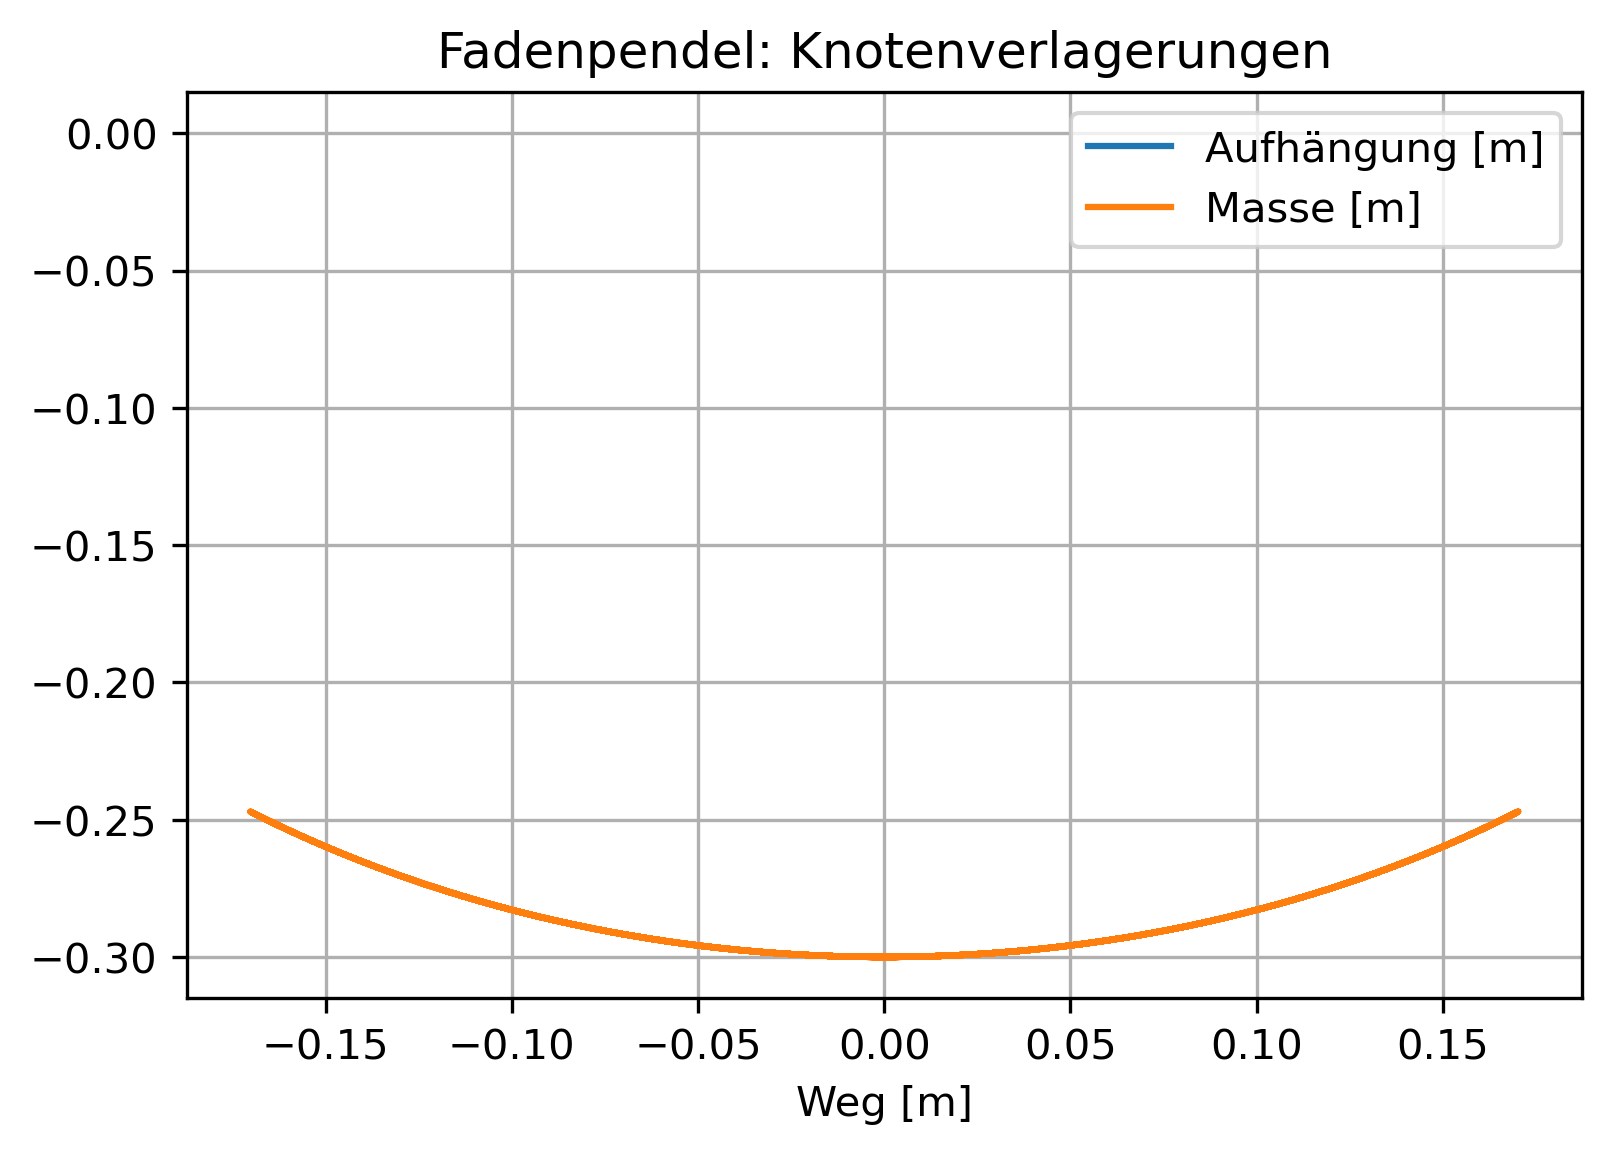

In [2]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.title('Fadenpendel: Knotenverlagerungen')
plt.plot(datenlogger_K1.y,datenlogger_K1.z,label='Aufhängung [m]')
plt.plot(datenlogger_K2.y,datenlogger_K2.z,label='Masse [m]')
#plt.xlim(0,20)
plt.xlabel('Weg [m]')
plt.grid(True)
plt.legend()
if (Bilder_speichern == True):
    plt.savefig('../output_bilder/lsdt_dynasim_fadenpendel1.png')

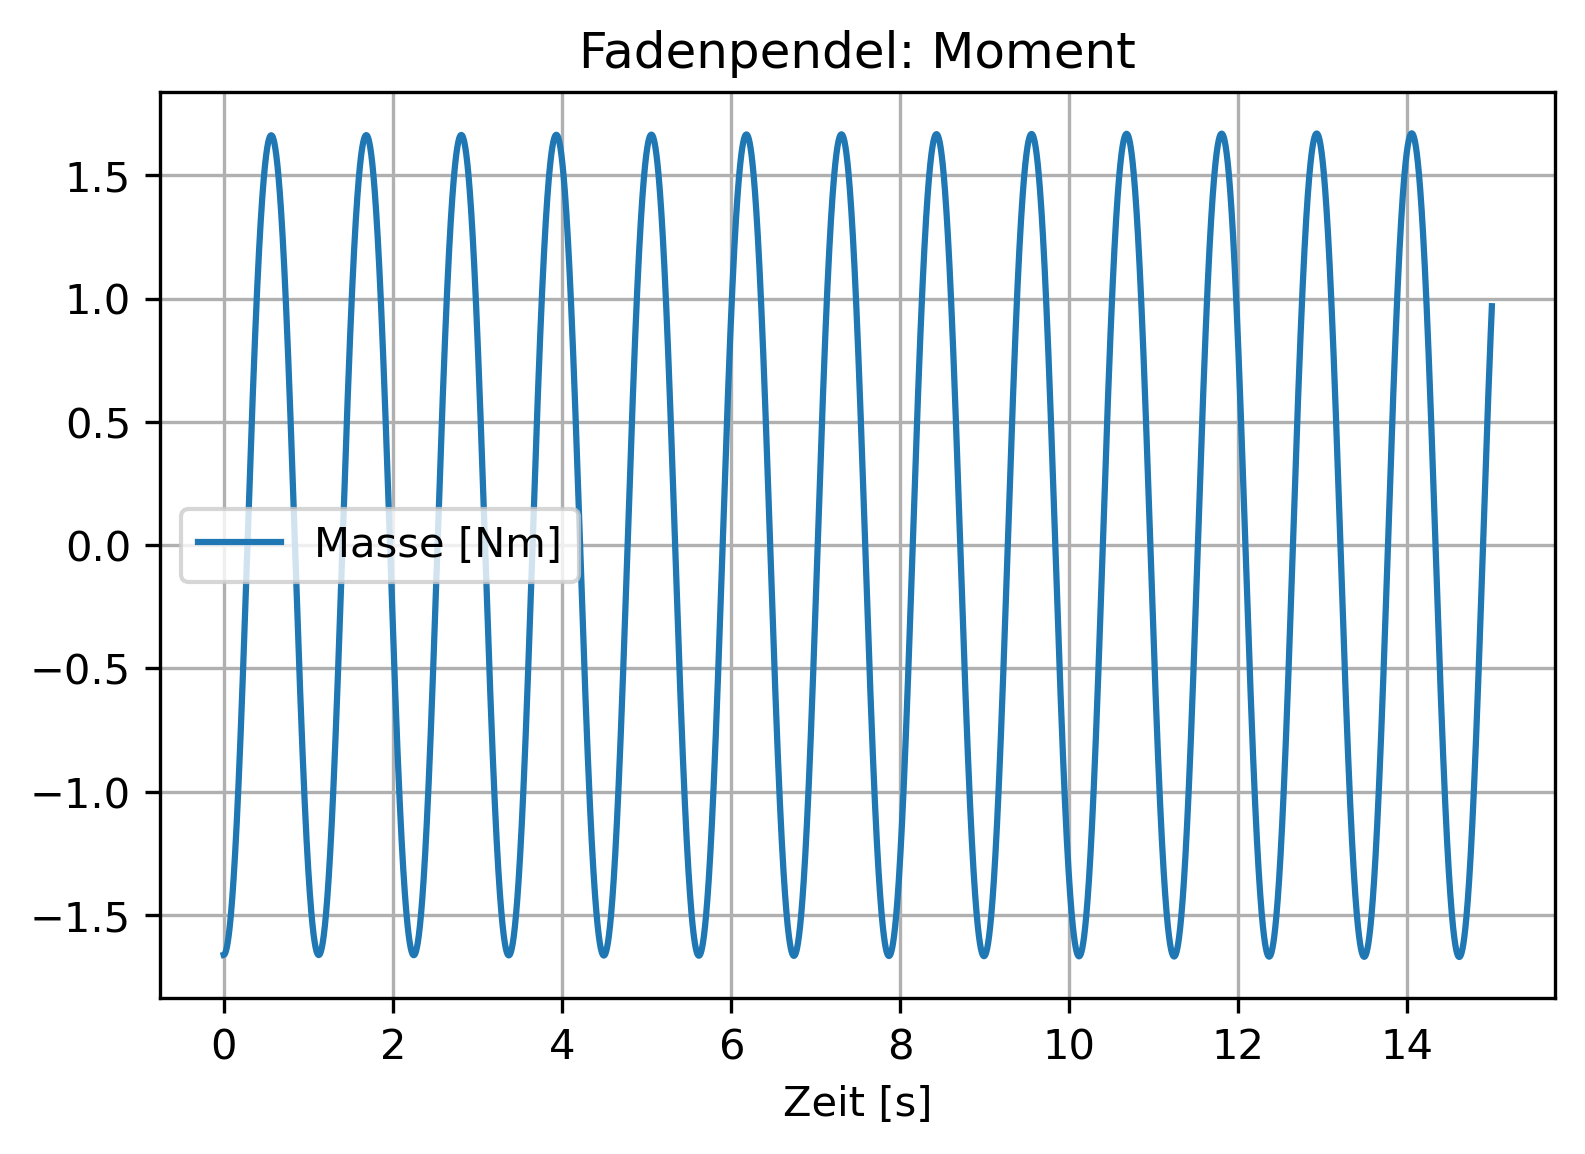

In [3]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.title('Fadenpendel: Moment')
plt.plot(datenlogger_t,datenlogger_K1.M_x,label='Masse [Nm]')
#plt.xlim(0,20)
plt.xlabel('Zeit [s]')
plt.grid(True)
plt.legend()
if (Bilder_speichern == True):
    plt.savefig('../output_bilder/lsdt_dynasim_fadenpendel2.png')

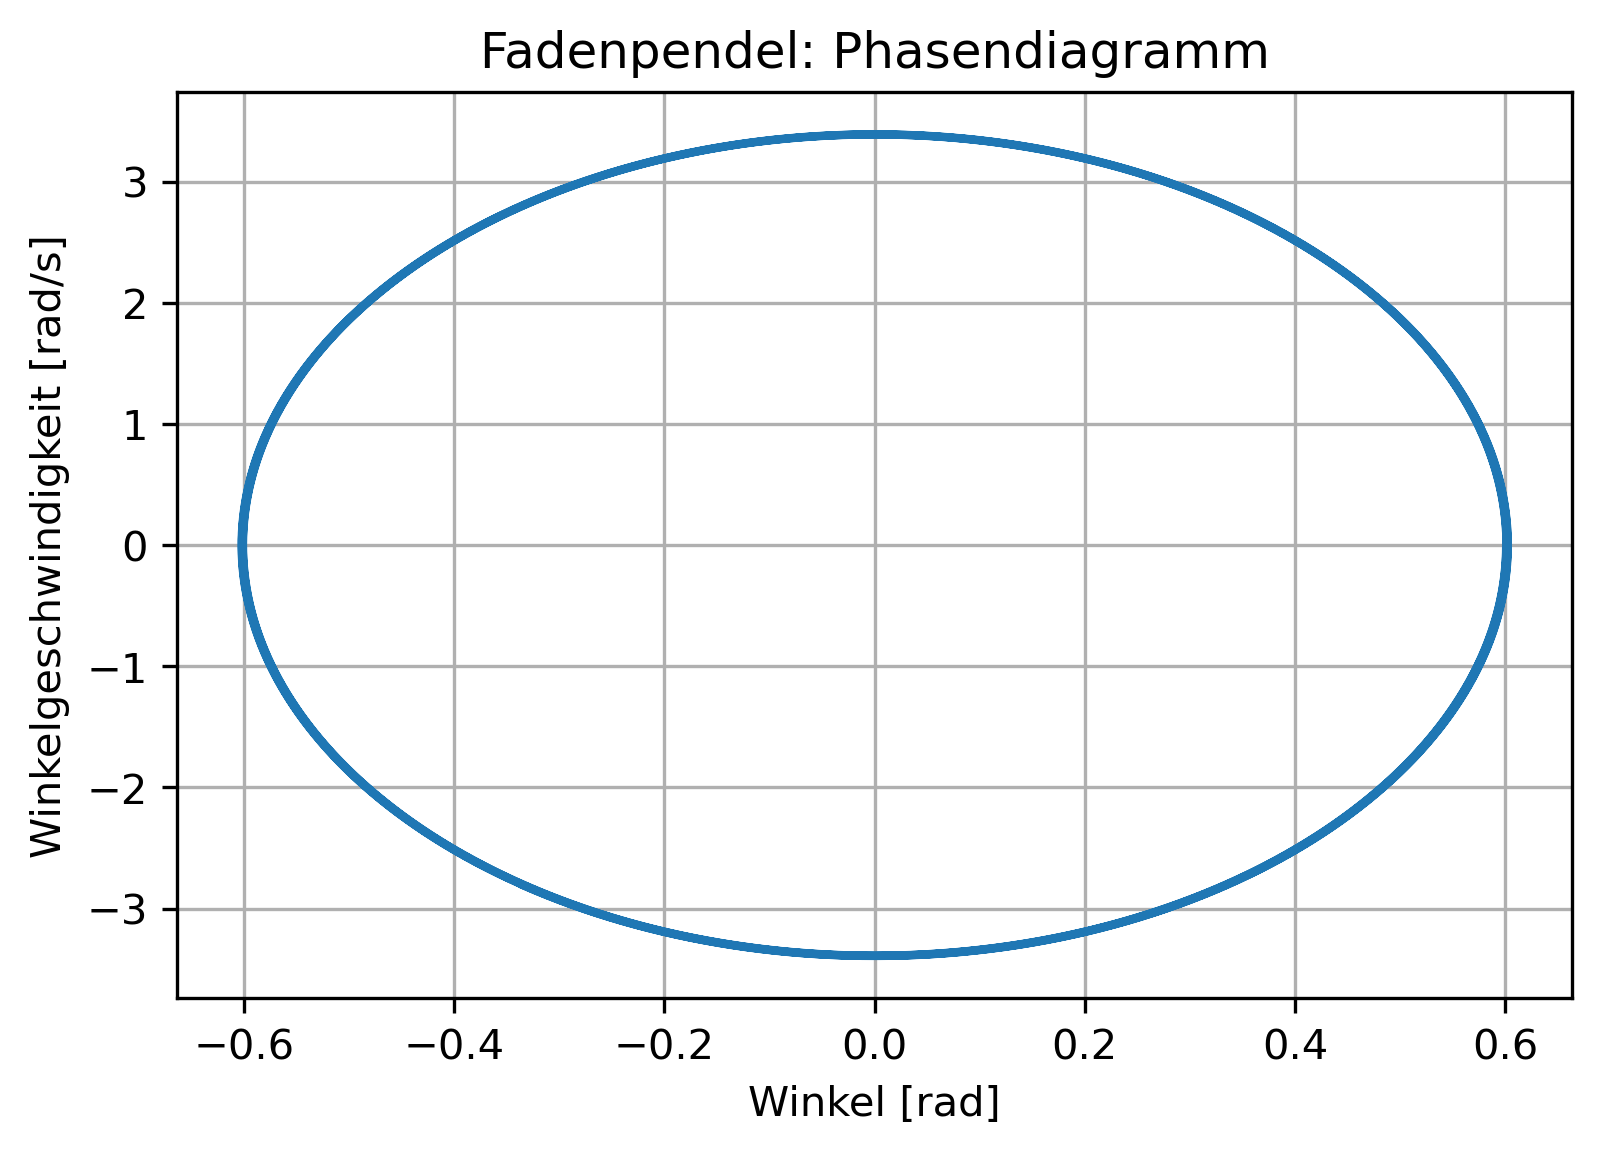

In [4]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.title('Fadenpendel: Phasendiagramm')
plt.plot(datenlogger_K1.rotx,datenlogger_K1.rotx_p,label='Masse')
#plt.xlim(0,20)
plt.xlabel('Winkel [rad]')
plt.ylabel('Winkelgeschwindigkeit [rad/s]')
plt.grid(True)
#plt.legend()
if (Bilder_speichern == True):
    plt.savefig('../output_bilder/lsdt_dynasim_fadenpendel3.png')

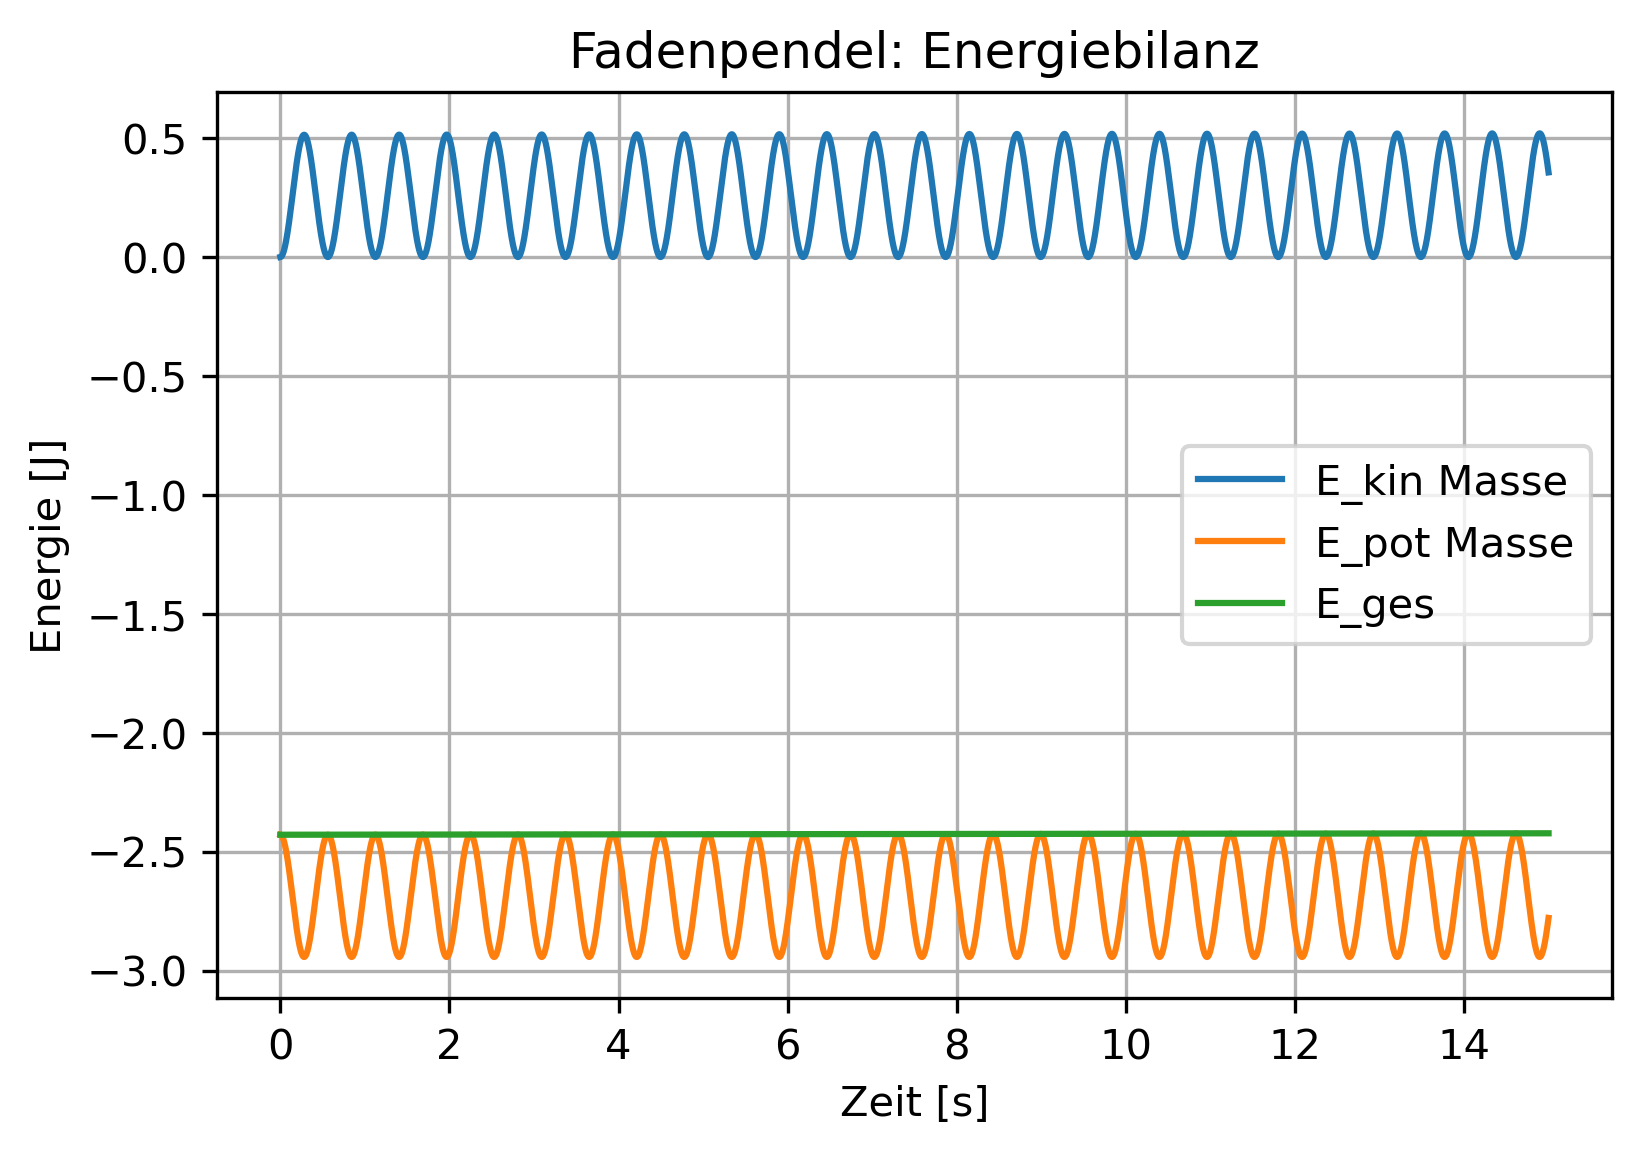

In [5]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.title('Fadenpendel: Energiebilanz')
E_ges = []
for point in range(len(datenlogger_E1.E_pot)):
    E_ges.append(datenlogger_E1.E_pot[point] + datenlogger_E1.E_kin[point])
plt.plot(datenlogger_t,datenlogger_E1.E_kin,label='E_kin Masse')
plt.plot(datenlogger_t,datenlogger_E1.E_pot,label='E_pot Masse')
plt.plot(datenlogger_t,E_ges,label='E_ges')
#plt.xlim(0,20)
plt.xlabel('Zeit [s]')
plt.ylabel('Energie [J]')
plt.grid(True)
plt.legend()
if (Bilder_speichern == True):
    plt.savefig('../output_bilder/lsdt_dynasim_fadenpendel4.png')